<a href="https://colab.research.google.com/github/nastenkass/homeworkMachineLearning/blob/main/hw02_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 2: kNN.

Правила:

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target'] # метка класса / категория вина
df.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`. При разделении выборки на тренировочную и тестовую, долю тестовой выборки задайте равной 0.3.

**Не забудьте зафиксировать** `np.random.seed()` равный вашему номеру по списку для воспроизводимости результатов.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [34]:
np.random.seed(23)
X = df[['alcohol', 'magnesium']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neighbors = [1, 3, 5, 10, 15, 25]
train_scores = []
test_scores = []
knns = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    knns.append(knn)

    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

print("NN    Train    Test")
for i in range(len(neighbors)):
    print(f"{neighbors[i]}    {train_scores[i]:.2f}    {test_scores[i]:.2f}")


# https://medium.com/geekculture/fit-vs-transform-vs-fit-transform-in-python-scikit-learn-2623d5a691e3#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImFkZjVlNzEwZWRmZWJlY2JlZmE5YTYxNDk1NjU0ZDAzYzBiOGVkZjgiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMDY1MTM3OTEwMDQ5NjAzMjMxMDgiLCJlbWFpbCI6Im5hc3R5YW5hc3R5YTExQHlhaG9vLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYmYiOjE3MTExOTk1NDMsIm5hbWUiOiJubmFhc3N0dHR5eWFhIHNzc2FhYXZ2dmlpbm5hYWEiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUNnOG9jSVJTNUV5dzJrcEhOSmlZb3NhZkpKUnM4dkdJbTlQZFhjbTdxNlVNZ3BsTGl3PXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6Im5uYWFzc3R0dHl5YWEiLCJmYW1pbHlfbmFtZSI6InNzc2FhYXZ2dmlpbm5hYWEiLCJpYXQiOjE3MTExOTk4NDMsImV4cCI6MTcxMTIwMzQ0MywianRpIjoiYTYzMDVjNDE2OWJlY2FkZDliYjY5NzYzZDNlNmMyMTU3M2YxMDc2ZiJ9.PNIF56VyhxZkfbi7unykkRnm2Fn0UOKxwooND2X6RguvlzynsRGRo35Vqvb30Yg8d2xE2PV82sh8nWafupcbepuDZ_JZUd5XVdYRXFg3OMJCM501aKgJJTtEYUIFaIxBIa05T48G6Ec3K4wzwd199NHUoxejSazU6bAYAeiO1KaDCJDOSeuZDaunePPqthZtyQh0bBLlDR72LWW4lvz4hP9nRRiwSGutQRvkBPBVJkErbQ-1YbK3SyczqvL3eZiC_rk-hH0QEghYTyhL_UYNfbl86aLmHjEhYOR1jkcIHbF1jeo8XAVZbm10h4VOsVIDjPM6xGX2UAgVZpQ8JN43Eg
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://stackoverflow.com/questions/6149006/how-to-display-a-float-with-two-decimal-places

NN    Train    Test
1    0.99    0.72
3    0.82    0.80
5    0.80    0.80
10    0.77    0.74
15    0.73    0.76
25    0.71    0.72


**Задача 2** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [20]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [22]:
import mlxtend

**Задача 3** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`.
5. Если в задаче 1 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

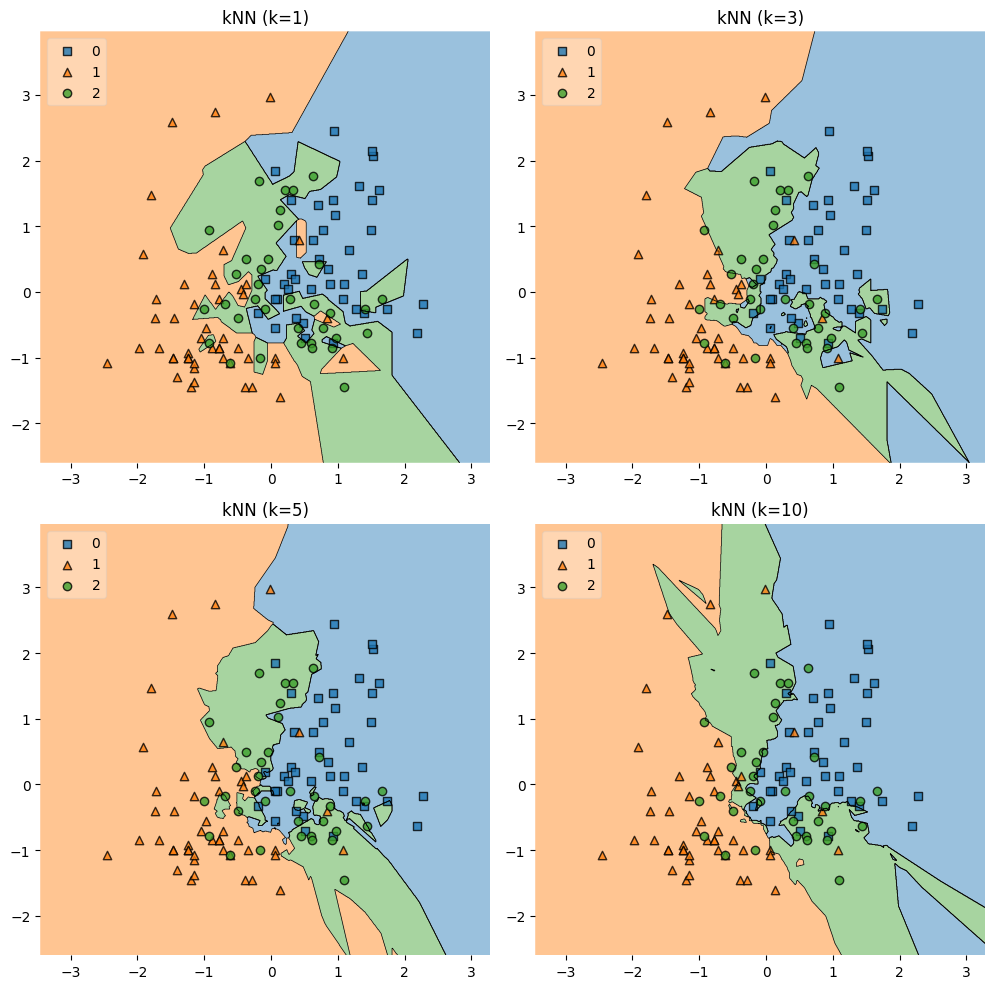

In [36]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 10))

labels = [f'kNN (k={n})' for n in neighbors]
for clf, lab, grd in zip(knns[:len(neighbors)],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()

**Задача 4** Прокомментируйте результаты, полученные в задачах 1 и 3. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

*your answer here*